In [1]:
# Import the required libraries and read the data sets
import pandas as pd
data = pd.read_csv("/Users/zhaozihao/Desktop/Dataset_book/Train_new.csv")

In [2]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,year,publisher
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,60885432,9.780000e+12,eng,374,71853,646,2007,HarperTrophy
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,380818957,9.780000e+12,en-US,384,1051,47,2002,Avon Books
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9.780000e+12,eng,167,1840,245,2006,Chicken House / Scholastic
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,439114284,9.780000e+12,en-US,80,162,11,2001,Scholastic Paperbacks
4,17800,Dance Dance Dance,Haruki Murakami,4.04,99448769,9.780000e+12,eng,393,50169,2117,2002,Vintage


In [3]:
# Feature selection, specific reasons for the selection in the above section
feature = data[["num_pages","ratings_count","text_reviews_count","year"]]
target = data[["average_rating"]]

In [4]:
# Divide the training set and the test set
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(feature,target,test_size = 0.1)

In [5]:
# import relevant libraries
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics

In [6]:
# Instantiate the decision tree regressor
regressor = DecisionTreeRegressor(random_state=0)
# train the model
regresor = regressor.fit(Xtrain,Ytrain)
# use mean_squared_error to judge the model regressor
predict_y=regressor.predict(Xtest)
metrics.mean_squared_error(predict_y,Ytest)

0.191120025

In [7]:
# max_depth=7，instantiate the decision tree regressor
regressor_depth7 = DecisionTreeRegressor(max_depth=7,random_state=0)
regressor_depth7 = regressor_depth7.fit(Xtrain,Ytrain)
# use mean_squared_error to judge the model regressor
predict_y7=regressor_depth7.predict(Xtest)
metrics.mean_squared_error(predict_y7,Ytest)

0.09171306118083257

In [8]:
# max_depth=10，instantiate the decision tree regressor
regressor_depth10 = DecisionTreeRegressor(max_depth=10,random_state=0)
regressor_depth10 = regressor_depth10.fit(Xtrain,Ytrain)
# use mean_squared_error to judge the model regressor
predict_y10=regressor_depth10.predict(Xtest)
metrics.mean_squared_error(predict_y10,Ytest)

0.11360858583871758

0.08131304554136404 3


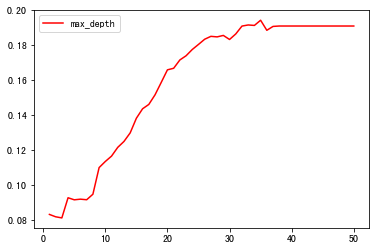

In [9]:
import matplotlib.pyplot as plt
# Create an empty list to hold the MSE under different max_depth
test = []
for i in range(50):
    regr = DecisionTreeRegressor(max_depth=i+1,random_state=0)
    regr = regr.fit(Xtrain,Ytrain)
    predict_y=regr.predict(Xtest)
    mse = metrics.mean_squared_error(predict_y,Ytest)
    test.append(mse)  
print(min(test),test.index(min(test))+1)
plt.plot(range(1,51),test,color='red',label='max_depth')
plt.legend()
plt.show()

0.07761226553544713 15


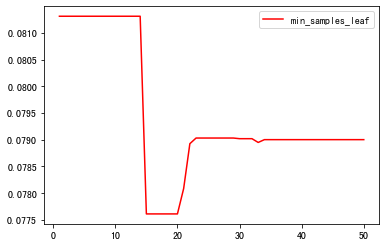

In [10]:
import matplotlib.pyplot as plt
# Create an empty list to hold the MSE under different min_samples_leaf
test = []
for i in range(50):
    regr = DecisionTreeRegressor(max_depth=3,min_samples_leaf=i+1,random_state=0)
    regr = regr.fit(Xtrain,Ytrain)
    predict_y=regr.predict(Xtest)
    mse = metrics.mean_squared_error(predict_y,Ytest)
    test.append(mse)   
print(min(test),test.index(min(test))+1)
plt.plot(range(1,51),test,color='red',label='min_samples_leaf')
plt.legend()
plt.show()

0.07761226553544713 2


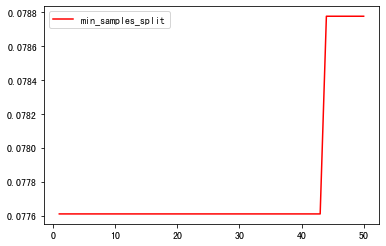

In [11]:
import matplotlib.pyplot as plt
# Create an empty list to hold the MSE under different min_samples_split
test = []
for i in range(50):
    regr = DecisionTreeRegressor(max_depth=3,min_samples_leaf=15,
                                 min_samples_split=i+2,random_state=0)
    regr = regr.fit(Xtrain,Ytrain)
    predict_y=regr.predict(Xtest)
    mse = metrics.mean_squared_error(predict_y,Ytest)
    test.append(mse)   
print(min(test),test.index(min(test))+2)
plt.plot(range(1,51),test,color='red',label='min_samples_split')
plt.legend()
plt.show()

In [12]:
# Test optimization results
regressor_test = DecisionTreeRegressor(max_depth=3,
                                       random_state=0,
                                       min_samples_leaf=15,
                                       min_samples_split=2
                                      )
regressor_test = regressor_test.fit(Xtrain,Ytrain)
# use mean_squared_error to judge the model regressor_test
predict_y_test=regressor_test.predict(Xtest)
metrics.mean_squared_error(predict_y_test,Ytest)

0.07761226553544713

In [14]:
# import test dataset
# Note:Test_new is different from Test_data.Test_data is original dataset,Test_new is a dataset with feature'year'
import pandas as pd
Test_data = pd.read_csv("/Users/zhaozihao/Desktop/Dataset_book/Test_new.csv")

In [15]:
# fetures selection
feature_test = Test_data[["num_pages","ratings_count","text_reviews_count","year"]]
target_test = Test_data[["average_rating"]]

In [16]:
regressor_test = DecisionTreeRegressor(max_depth=3,
                                       random_state=0,
                                       min_samples_leaf=15,
                                       min_samples_split=2
                                      )
regressor_test = regressor_test.fit(Xtrain,Ytrain)
# predict
predict_y_test_data=regressor_test.predict(feature_test)

In [17]:
predict_y_test_data

array([4.05983728, 3.9122389 , 3.9122389 , 3.96930864, 3.9122389 ,
       3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 ,
       3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 , 3.96930864,
       3.96930864, 3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 ,
       3.96930864, 4.05983728, 4.05983728, 3.9122389 , 3.9122389 ,
       4.05983728, 3.9122389 , 3.96930864, 3.9122389 , 3.9122389 ,
       3.9122389 , 3.9122389 , 4.05983728, 3.96930864, 3.9122389 ,
       3.96930864, 3.9122389 , 4.05983728, 3.9122389 , 3.9122389 ,
       3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 , 3.96930864,
       3.96930864, 3.9122389 , 3.9122389 , 3.9122389 , 4.05983728,
       3.96930864, 4.05983728, 3.9122389 , 3.96930864, 3.9122389 ,
       3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 ,
       3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 , 3.9122389 ,
       3.96930864, 3.9122389 , 3.96930864, 3.96930864, 3.96930864,
       3.96930864, 3.9122389 , 4.2327907 , 3.9122389 , 3.91223

In [18]:
type(predict_y_test_data)

numpy.ndarray

In [19]:
df = pd.DataFrame(predict_y_test_data,columns = ["average_rating"])
print(df)

     average_rating
0          4.059837
1          3.912239
2          3.912239
3          3.969309
4          3.912239
..              ...
995        3.912239
996        3.969309
997        4.059837
998        3.912239
999        3.912239

[1000 rows x 1 columns]


In [20]:
# output a new csv file with average_rating
df.to_csv("/Users/zhaozihao/Desktop/Test_result_DTR.csv",index = False)

In [ ]:
# For each training,we have different parameter setting in order to optimize the model
# So the analysis process in the report is different from this result